# **ANN for Regression**

**Installations**

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


**Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
import keras 
from keras import layers

**Loading Datasets**

In [3]:
df = pd.read_csv("../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [4]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Checking for duplicates**

In [5]:
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [6]:
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

This dataset is relatively clean out of box so not much cleaning is needed but there will be further feature engineering done if this dataset is reused again. It was kept similar this time to compare with Linear Regression.

**Define X and y -variables**

In [24]:
X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df[["heating_load", "cooling_load"]]

**train/test/validation -split**

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

**Neural Network**

In [26]:
input_shape = (X_train.shape[1],)

inputs = keras.Input(shape=input_shape)
x = layers.Dense(12, activation="relu")(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)

heating_output = layers.Dense(1, name="heating_load")(x)
cooling_output = layers.Dense(1, name="cooling_load")(x)

model = keras.Model(inputs=inputs, outputs=[heating_output, cooling_output])

model.compile(optimizer="adam", loss="mse")
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 12)        │        108 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │        416 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │        528 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ heating_load        │ (None, 1)         │         17 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cooling_load        │ (None, 1)         │         17 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,086 (4.24 KB)

 Trainable params: 1,086 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

I created two output layers with explicit names to create this multi-output as this way both outputs will share hidden layers and can learn relationships between each other. The method was found with the help of ChatGPT and instead of creating a simple sequential model which is in class examples it suggested to use a "Functional API Model" which is more flexible and allows multiple outputs.

**Training**

In [27]:
model.fit(X_train, [y_train["heating_load"], y_train["cooling_load"]], epochs=1200, 
          validation_data=(X_val, [y_val["heating_load"], y_val["cooling_load"]])
)


Epoch 1/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - cooling_load_loss: 4557.1011 - heating_load_loss: 195.7033 - loss: 4792.7842 - val_cooling_load_loss: 1890.5698 - val_heating_load_loss: 119.7388 - val_loss: 2028.1288
Epoch 2/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 941.8197 - heating_load_loss: 110.9542 - loss: 1059.7745 - val_cooling_load_loss: 408.0617 - val_heating_load_loss: 62.9747 - val_loss: 465.1471
Epoch 3/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 461.2018 - heating_load_loss: 68.7737 - loss: 531.9456 - val_cooling_load_loss: 313.1911 - val_heating_load_loss: 45.4151 - val_loss: 357.9519
Epoch 4/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 319.2933 - heating_load_loss: 56.9726 - loss: 375.8260 - val_cooling_load_loss: 221.6497 - val_heating_load_loss: 39.7899 - val_loss: 259.9138
Epoch 5/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 233.4713 - heating_load_loss: 54.5998 - loss: 289.2310 

<Axes: >

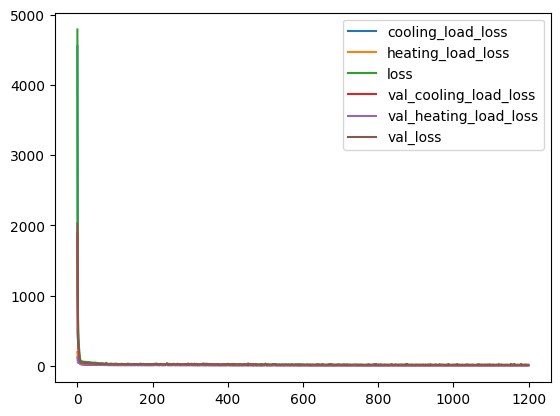

In [28]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [29]:
print("Test data evaluation:")
print(model.evaluate(X_test, [y_test["heating_load"], y_test["cooling_load"]], verbose=0))

print("\nTrain data evaluation:")
print(model.evaluate(X_train, [y_train["heating_load"], y_train["cooling_load"]], verbose=0))


Test data evaluation:
[15.419625282287598, 6.426300048828125, 9.11273193359375]

Train data evaluation:
[12.39327621459961, 5.095191478729248, 7.298059940338135]


we can see from the training loss plot and evaluation that model is generalizing well and there isnt any overfitting. Heating load and cooling load are both similar

In [30]:
test_predictions = model.predict(X_test)

heating_pred = test_predictions[0].flatten()
cooling_pred = test_predictions[1].flatten()

pred_df = pd.DataFrame({
    "True Heating Load": y_test["heating_load"].values,
    "Pred Heating Load": heating_pred,
    "True Cooling Load": y_test["cooling_load"].values,
    "Pred Cooling Load": cooling_pred
})

pred_df.head()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


,True Heating Load,Pred Heating Load,True Cooling Load,Pred Cooling Load
0,36.06,37.682323,35.73,38.353336
1,12.71,13.594290,14.14,16.648876
2,16.90,17.452593,16.79,19.217672
3,16.86,15.806147,20.01,18.125671
4,25.98,31.004452,26.96,33.263138


The predictions are somewhat close to actual values so model is working well but there could be improvements.

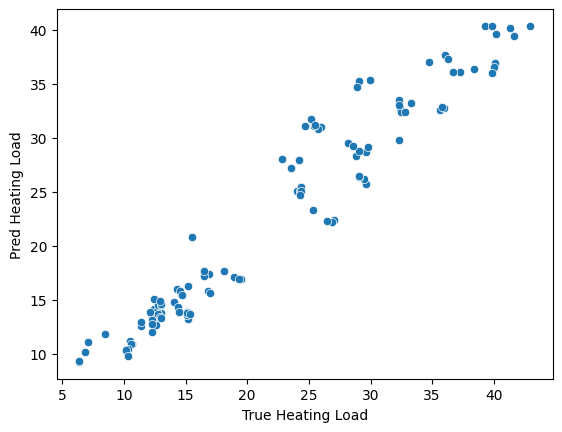

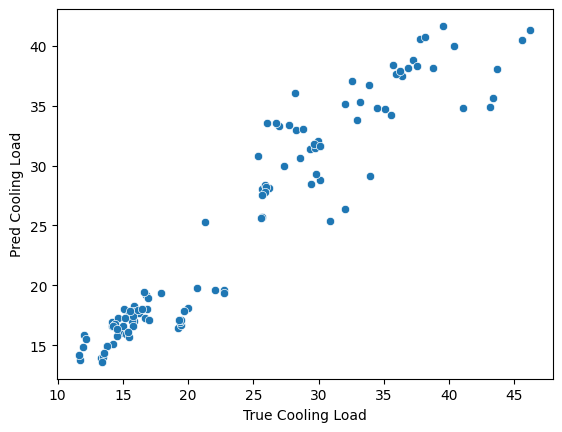

In [31]:
sns.scatterplot(x='True Heating Load', y='Pred Heating Load', data=pred_df)
plt.show()
sns.scatterplot(x='True Cooling Load', y='Pred Cooling Load', data=pred_df)
plt.show()

The plots are roughly following a linear trend but there is slightly more scatter especially in cooling load which I will try to improve with optimisations.

In [38]:
from sklearn import metrics
import numpy as np

heating_true = y_test["heating_load"].values
cooling_true = y_test["cooling_load"].values
heating_pred = test_predictions[0].flatten()
cooling_pred = test_predictions[1].flatten()

print("Heating Load Metrics:")
print("MAE:", round(metrics.mean_absolute_error(heating_true, heating_pred), 2))
print("MSE:", round(metrics.mean_squared_error(heating_true, heating_pred), 2))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(heating_true, heating_pred)), 2))
print("R-squared:", round(metrics.r2_score(heating_true, heating_pred), 2))
print("Explained Variance:", round(metrics.explained_variance_score(heating_true, heating_pred), 2))

print("\nCooling Load Metrics:")
print("MAE:", round(metrics.mean_absolute_error(cooling_true, cooling_pred), 2))
print("MSE:", round(metrics.mean_squared_error(cooling_true, cooling_pred), 2))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(cooling_true, cooling_pred)), 2))
print("R-squared:", round(metrics.r2_score(cooling_true, cooling_pred), 2))
print("Explained Variance:", round(metrics.explained_variance_score(cooling_true, cooling_pred), 2))


Heating Load Metrics:
MAE: 1.93
MSE: 6.44
RMSE: 2.54
R-squared: 0.94
Explained Variance: 0.94

Cooling Load Metrics:
MAE: 2.42
MSE: 8.98
RMSE: 3.0
R-squared: 0.9
Explained Variance: 0.91


The metrics are good but quite similar to linear regression model so without optimisations Linear regression model might be a better choice as its more simpler and lighter unless we can optimise ANN for better results.

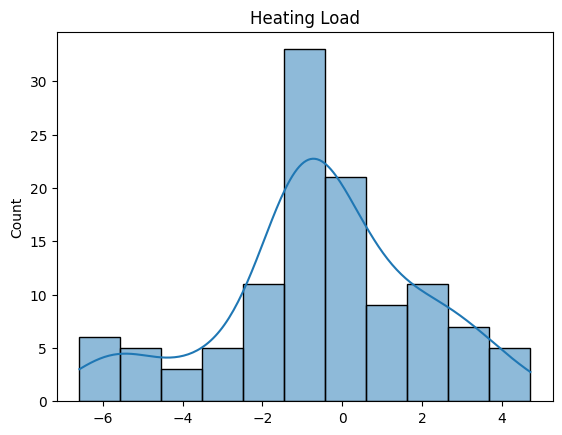

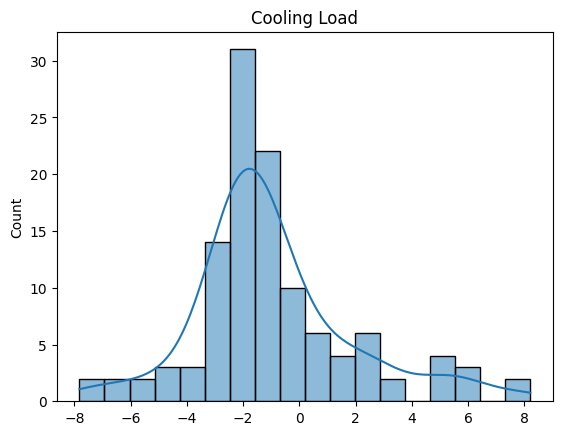

In [33]:
sns.histplot(heating_true - heating_pred, kde=True)
plt.title("Heating Load")
plt.show()

sns.histplot(cooling_true - cooling_pred, kde=True)
plt.title("Cooling Load")
plt.show()

Both distributions are slightly skewed to left with cooling load spread being slightly more wider showing more variability

**Test with imaginary values**

In [17]:
df.tail()


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0,16.64,16.03


In [35]:
tester_row = {
    'relative_compactness': 0.65,
    'surface_area': 774.0,
    'wall_area': 243.0,
    'roof_area': 320.5,
    'overall_height': 4.5,
    'orientation': 2.0,
    'glazing_area': 0.2,
    'glazing_area_distribution': 6.0
}

tester_row = pd.DataFrame([tester_row])


In [36]:
import pandas as pd
import numpy as np

tester_row = tester_row.astype(np.float32)

result = model.predict(tester_row)

heating_load = result[0][0][0]
cooling_load = result[1][0][0]

print(f"Predicted Heating Load: {heating_load:.2f}")
print(f"Predicted Cooling Load: {cooling_load:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Heating Load: 27.57
Predicted Cooling Load: 21.42


**Exporting Model**

In [37]:
model.save("ann_regression_model.keras")

**Summary**

ANN offers more complexity and ability to capture non-linear relations between multiple features but it requires more optimisation to get good results and a really complex dataset might benefit more but in this case Linear regression is already able to capture the essence of this dataset as it relatively simple so ANN without optimisations might be overkill